Three observable trends from the data: 

1. Humidity, cloudiness and windspeed don't seem to have a trend when it comes to the latitude. They vary by location. 

2. Max temperature is the highest around the equator and spreads out the farther you get away from the equator. 

3. There is no strong relationship between latitude and windspeed or latitude and humidity. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [4]:
# Perform API Calls

In [5]:
# save api_keys information:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

In [6]:
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []


# Print
print("Beginning Data Retrieval     ")
print("-------------------------")

# Creating counters:
record_count = 1
set_count = 1


# Looping through all the cities
for i, city in enumerate(cities):
       
    # Create the endpoint query_url with each city:
    city_url = query_url + city
    
    
 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adding 1 to the record count for printing:
    record_count += 1

    # Running the API request for each of the cities 
    
    try:
        
        # Make request and store in json
        response = requests.get(city_url).json()
        
        
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        time.sleep(2)
        
    # Handle exceptions for experienced error, skip the city:
    except:
       
        print("City not found. Skipping...")
        pass 
    
# Include a print log of each city as its being retrieved 
print("---------------------------")
print("Data Retrieval Complete!      ")
print("---------------------------")  

Beginning Data Retrieval     
-------------------------
Processing Record 1 of Set 1 | hay river
Processing Record 2 of Set 1 | iquique
Processing Record 3 of Set 1 | oranjemund
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | wakkanai
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | yumen
Processing Record 10 of Set 1 | mount isa
Processing Record 11 of Set 1 | suffolk
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | dalvik
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | puerto del rosario
Processing Record 16 of Set 1 | nuevo progreso
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | loanda
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | fare
Processing Record 21 of Set 1 | luderitz
Processing Record 22 of Set 1 | maldonado
Proc

Processing Record 36 of Set 4 | kudahuvadhoo
Processing Record 37 of Set 4 | hasaki
Processing Record 38 of Set 4 | grindavik
Processing Record 39 of Set 4 | amderma
City not found. Skipping...
Processing Record 40 of Set 4 | puerto carreno
Processing Record 41 of Set 4 | nanyang
Processing Record 42 of Set 4 | komsomolskiy
Processing Record 43 of Set 4 | badvel
Processing Record 44 of Set 4 | mogadishu
Processing Record 45 of Set 4 | uray
Processing Record 46 of Set 4 | cap-aux-meules
Processing Record 47 of Set 4 | upernavik
Processing Record 48 of Set 4 | mehamn
Processing Record 49 of Set 4 | batemans bay
Processing Record 0 of Set 5 | vestmannaeyjar
Processing Record 1 of Set 5 | urambo
Processing Record 2 of Set 5 | eregli
Processing Record 3 of Set 5 | kachug
Processing Record 4 of Set 5 | marcona
City not found. Skipping...
Processing Record 5 of Set 5 | port hawkesbury
Processing Record 6 of Set 5 | leshukonskoye
Processing Record 7 of Set 5 | dolbeau
City not found. Skipping.

Processing Record 26 of Set 8 | kalinagar
Processing Record 27 of Set 8 | pekalongan
Processing Record 28 of Set 8 | halalo
City not found. Skipping...
Processing Record 29 of Set 8 | kiruna
Processing Record 30 of Set 8 | loandjili
Processing Record 31 of Set 8 | jalu
Processing Record 32 of Set 8 | toora-khem
Processing Record 33 of Set 8 | san mateo del mar
Processing Record 34 of Set 8 | norman wells
Processing Record 35 of Set 8 | macheng
Processing Record 36 of Set 8 | gat
Processing Record 37 of Set 8 | tokmak
Processing Record 38 of Set 8 | pueblo nuevo
Processing Record 39 of Set 8 | montijo
Processing Record 40 of Set 8 | karaton
Processing Record 41 of Set 8 | dhidhdhoo
Processing Record 42 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 43 of Set 8 | ahipara
Processing Record 44 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 45 of Set 8 | osoyoos
Processing Record 46 of Set 8 | la ronge
Processing Record 47 of Set 8 | bayan
Processing Rec

Processing Record 12 of Set 12 | ulverstone
Processing Record 13 of Set 12 | witu
Processing Record 14 of Set 12 | aneho
Processing Record 15 of Set 12 | si racha
Processing Record 16 of Set 12 | diplo
Processing Record 17 of Set 12 | lesnoye
Processing Record 18 of Set 12 | limbe
Processing Record 19 of Set 12 | taebla
Processing Record 20 of Set 12 | winburg
Processing Record 21 of Set 12 | kahta
Processing Record 22 of Set 12 | albion
Processing Record 23 of Set 12 | bilibino
Processing Record 24 of Set 12 | pauini
Processing Record 25 of Set 12 | bonavista
Processing Record 26 of Set 12 | yatou
Processing Record 27 of Set 12 | piet retief
Processing Record 28 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 29 of Set 12 | leningradskiy
Processing Record 30 of Set 12 | belmonte
Processing Record 31 of Set 12 | bondo
Processing Record 32 of Set 12 | necochea
Processing Record 33 of Set 12 | alugan
Processing Record 34 of Set 12 | maimon
City not found. Skipping

In [7]:
# Creating data frame
city_df ={
    "City": city_data, 
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
     "Date": city_date}

weather_df = pd.DataFrame(city_df)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hay River,60.8156,-115.7999,85.98,32,75,6.91,CA,1660851476
1,Iquique,-20.2208,-70.1431,62.64,73,19,8.19,CL,1660851238
2,Oranjemund,-28.5500,16.4333,54.12,88,2,15.23,NA,1660851481
3,Ushuaia,-54.8000,-68.3000,42.46,61,75,5.75,AR,1660851483
4,Jamestown,42.0970,-79.2353,79.95,45,75,6.91,US,1660851309


In [8]:
weather_df.to_csv("output_data/city_weather.csv", index=False, header=True)

In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,20.379396,14.148836,68.358548,70.716846,52.541219,8.179731,1.660861e+09
std,33.476329,88.573757,14.522372,19.718634,39.634383,5.520036,5.806558e+03
min,-54.800000,-175.200000,35.620000,10.000000,0.000000,0.000000,1.660851e+09
25%,-6.146225,-62.839950,55.890000,61.000000,8.000000,4.160000,1.660852e+09
50%,24.280050,17.484850,71.200000,75.000000,57.000000,6.860000,1.660865e+09
75%,47.928275,92.246025,79.647500,85.000000,95.000000,11.500000,1.660865e+09
max,78.218600,178.416700,106.610000,100.000000,100.000000,30.740000,1.660865e+09


In [10]:
#Inspect the data and remove the cities where the humidity > 100%.

In [11]:
weather_df.loc[weather_df["Humidity"] >= 100]["Humidity"].count()


4

In [12]:
hum_100 = weather_df[weather_df.Humidity > 100].index
hum_100

Int64Index([], dtype='int64')

In [13]:
clean_city_data = weather_df
for x in hum_100:
    clean_city_data = weather_df.drop([x])
clean_city_data    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hay River,60.8156,-115.7999,85.98,32,75,6.91,CA,1660851476
1,Iquique,-20.2208,-70.1431,62.64,73,19,8.19,CL,1660851238
2,Oranjemund,-28.5500,16.4333,54.12,88,2,15.23,NA,1660851481
3,Ushuaia,-54.8000,-68.3000,42.46,61,75,5.75,AR,1660851483
4,Jamestown,42.0970,-79.2353,79.95,45,75,6.91,US,1660851309
...,...,...,...,...,...,...,...,...,...
553,Fairbanks,64.8378,-147.7164,66.22,45,75,3.44,US,1660865393
554,Beloha,-25.1667,45.0500,60.87,69,7,5.32,MG,1660865395
555,Saint-Pierre,-21.3393,55.4781,70.92,71,40,5.75,RE,1660865397
556,Carbondale,37.7273,-89.2168,85.05,55,40,5.75,US,1660865400


In [14]:
# Latitude vs. Temperature 

In [15]:
latitude = clean_city_data .Lat
max_temp = clean_city_data ["Max Temp"]
humidity = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data['Wind Speed']

# Export the clean_city_data into a csv:
clean_city_data.to_csv("output_data/clean_city_data.csv", index=False, header=True)

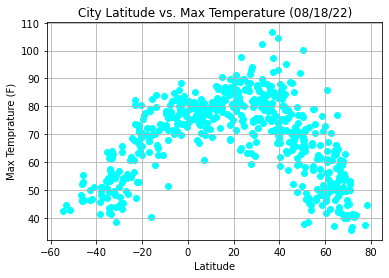

In [16]:
x_values = latitude
y_values = max_temp

plt.scatter(x_values,y_values, marker = "o", facecolor = "cyan")

plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Images/lat_vs_temp.png")
plt.show()

In [17]:
#this plot is showing the max temps for each city in my data based on the latitude where those cities are located. 

In [18]:
#Humidity (%) vs. Latitude

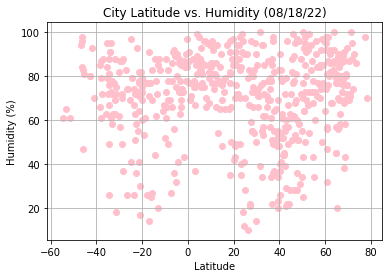

In [19]:
x_values = latitude
y_values = humidity

plt.scatter(x_values,y_values, marker = "o", facecolor = "pink")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Images/lat_vs_humid.png")
plt.show()

In [20]:
#this plot shows the humidity for each city in my data based on the latitude. 

In [21]:
#Cloudiness (%) vs. Latitude

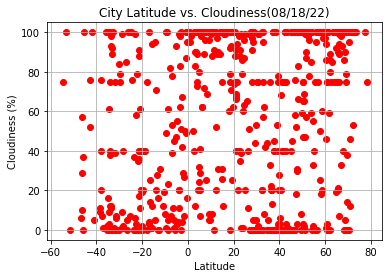

In [22]:
x_values = latitude
y_values = cloud

plt.scatter(x_values,y_values, marker = "o", facecolor = "red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Images/lat_vs_cloud.png")
plt.show()

In [23]:
#this plot is showing how cloudy the cities in my data are, based on the latitude of them. 

In [24]:
#Wind Speed (mph) vs. Latitude

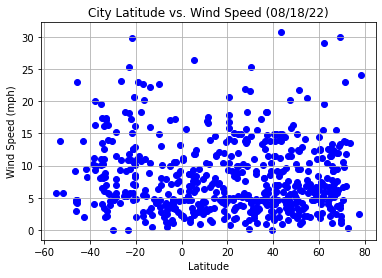

In [25]:
x_values = latitude
y_values = wind

plt.scatter(x_values,y_values, marker = "o", facecolor = "blue")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Images/lat_vs_wind.png")
plt.show()

In [26]:
#this plot is showing the top wind speed in the cities in my data based on thier latitudes. 

In [27]:
#Northern and Southern hemisphere regressions 

In [28]:
#determining N and S hemisphere 

n_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
s_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

In [29]:
x_values = pd.to_numeric(n_hemisphere['Lat'])
y_values = pd.to_numeric(n_hemisphere['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


The p-value is: 9.158881916529612e-54
The r-value is: -0.6790170399704626


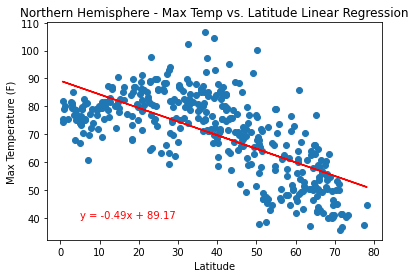

In [30]:
# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=10,color="r")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/north_temp_lg.png")
plt.show()

In [31]:
x_values = pd.to_numeric(s_hemisphere['Lat'])
y_values = pd.to_numeric(s_hemisphere['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The p-value is: 1.5509718562078856e-43
The r-value is: 0.8252203217803764


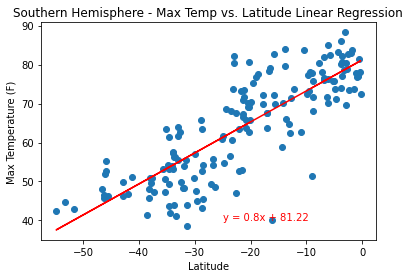

In [32]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=10,color="r")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/south_temp_lg.png")
plt.show()

In [33]:
#After each pair of plots, explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.


#In the both the northern and sothern hemisphere the temperature increases the closer you are to the equator.


In [34]:
x_values = pd.to_numeric(n_hemisphere['Lat'])
y_values = pd.to_numeric(n_hemisphere['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


The p-value is: 0.3933740885576189
The r-value is: -0.043450352983347464


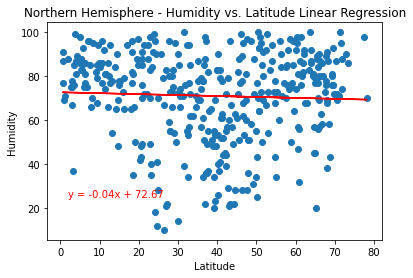

In [35]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,25),fontsize=10,color="r")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/north_humidity_lg.png")
plt.show()

In [36]:
x_values = pd.to_numeric(s_hemisphere['Lat'])
y_values = pd.to_numeric(s_hemisphere['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


The p-value is: 0.590670244400582
The r-value is: -0.04154103692095337


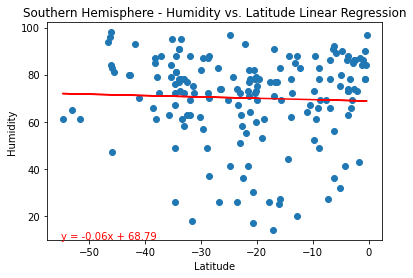

In [37]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=10,color="r")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/south_humidity_lg.png")
plt.show()

In [38]:
#After each pair of plots, explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have

#in the northern hemisphere as you move farther away from the equator the humidity increases. 
#in the southern hemisphere as you move closer to the equator the humidity increases. 

In [39]:
x_values = pd.to_numeric(n_hemisphere['Lat'])
y_values = pd.to_numeric(n_hemisphere['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


The p-value is: 0.8714461578316999
The r-value is: 0.008241710796785557


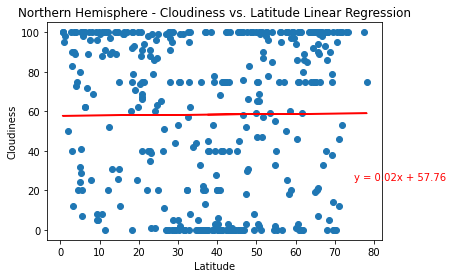

In [40]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,25),fontsize=10,color="r")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/north_cloud_lg.png")
plt.show()

In [41]:
x_values = pd.to_numeric(s_hemisphere['Lat'])
y_values = pd.to_numeric(s_hemisphere['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


The p-value is: 0.9134586836398942
The r-value is: -0.00839695094918054


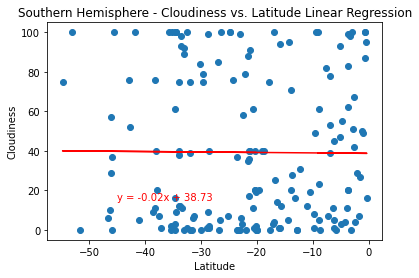

In [42]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,15),fontsize=10,color="r")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/south_cloud_lg.png")
plt.show()

In [43]:
#After each pair of plots, explain what the linear regression is modeling.For example, describe any relationships that you notice and any other findings you may have.

#in the northern hemisphere there is no significance with latitude and cloudiness
#in the southern hemisphere when you move closer to the equator you will have less clouds.


In [44]:
x_values = pd.to_numeric(n_hemisphere['Lat'])
y_values = pd.to_numeric(n_hemisphere['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


The p-value is: 0.20156355191361416
The r-value is: 0.06497652775958845


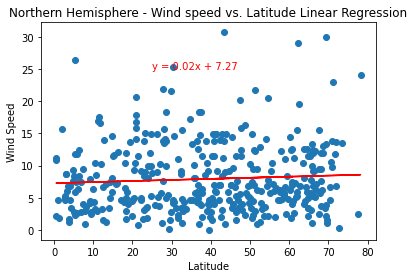

In [45]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,25),fontsize=10,color="r")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind speed vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/north_wind_lg.png")
plt.show()

In [46]:
x_values = pd.to_numeric(s_hemisphere['Lat'])
y_values = pd.to_numeric(s_hemisphere['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


The p-value is: 0.025853813508215466
The r-value is: -0.1709119644688489


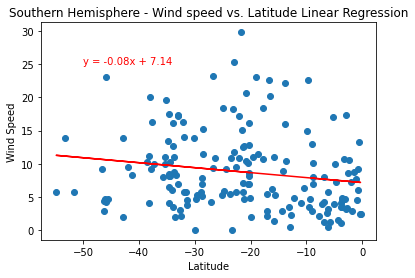

In [47]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=10,color="r")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind speed vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/south_wind_lg.png")
plt.show()

In [ ]:
#After each pair of plots, explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.

#in the northern hemisphere when you get closer to the equator wind decreases
#in the sothern hemisphere when you get closer to the equator wind also decreases. 
